A simple application of semi-supervised regression for two moons data set. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets

Text(0.5, 1.0, 'Labelled and unlabelled data sets')

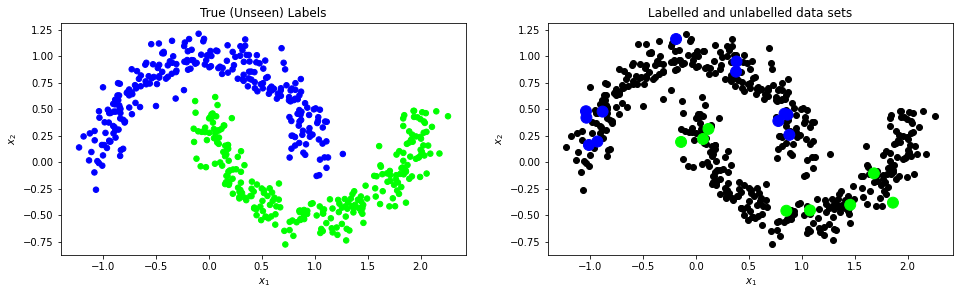

In [2]:
# generate a mixture model using sklearn's data generation function

N = 512 # total number of samples 

M = 20

# K means on two moons

X, labels = skl.datasets.make_moons(n_samples=N, noise= 0.1, random_state=0)

labels = 2*labels - 1

Y = labels[0:M]

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=labels, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[M:None,0], X[M:None,1], color='k')
ax[1].scatter(X[0:M,0], X[0:M,1], c= Y, cmap ='brg', s = 120)
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Labelled and unlabelled data sets')

In [3]:
# construct graph Laplacian and compute eigenvectors 

def eta(tt, rr):

  val = tt <= rr 

  return val.astype(float)

import scipy.spatial 

dist = scipy.spatial.distance_matrix( X, X, p =2)

r = 0.2

W = eta( dist, r)

d = np.sum(W, axis=1) # degree vector

D = np.diag(d)

L = D - W # unnormalized

ll, VV = np.linalg.eigh(L) # compute eigendecompositions 

idx = ll.argsort()
l = ll[idx]
V = VV[:, idx]

In [8]:
print(V.shape)

(512, 512)


In [9]:
K = 5 # number of eigenvectors to use as feature maps in regression 

Vp = V[0:M, 0:K]

from sklearn.linear_model import Ridge

SSLRidge = Ridge(alpha = 1e-8, fit_intercept=False) # we don't really need regularization here since K is small compared to M

SSLRidge.fit(Vp, Y)

Ridge(alpha=1e-08, fit_intercept=False)

In [10]:
# predict labels on entire data set 

c_hat = SSLRidge.coef_

Y_pred =  np.dot(V[:, 0:K], c_hat)


In [11]:
c_hat

array([-0.19413878, 22.5020422 , -1.93508041,  0.71228234, -0.35099214])

Text(0.5, 1.0, 'Predicted Y values')

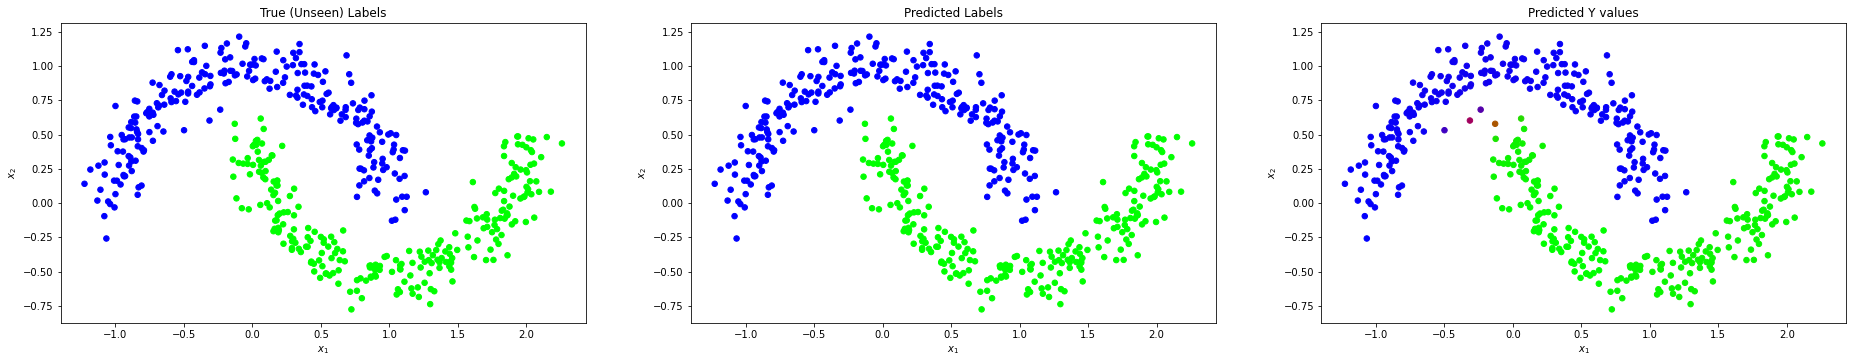

In [12]:
fig, ax = plt.subplots(1,3, figsize=(32,8))

ax[0].scatter(X[:,0], X[:,1], c=labels, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], c=np.sign(Y_pred), s= 30, cmap='brg')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Predicted Labels')

ax[2].scatter(X[:,0], X[:,1], c=Y_pred, s= 30, cmap='brg')
ax[2].set_aspect('equal')
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$x_2$')
ax[2].set_title('Predicted Y values')